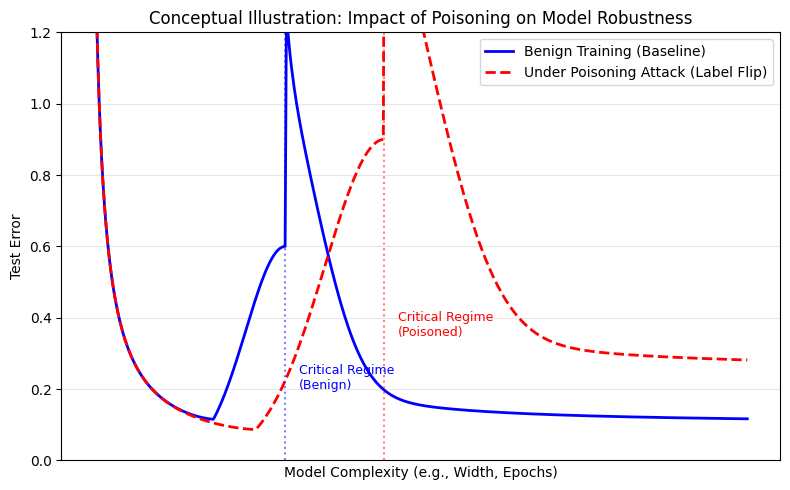

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def double_descent_curve(x, peak_pos, peak_height, noise_floor):
    """ฟังก์ชันจำลองกราฟ Double Descent"""
    # ช่วง Under-parameterized (U-shape ลงมาแล้วขึ้น)
    y1 = 1 / (0.5 * x + 0.1) 
    
    # ช่วง Critical (พุ่งขึ้น Peak)
    sigma = peak_pos * 0.2
    peak = peak_height * np.exp(-((x - peak_pos)**2) / (2 * sigma**2))
    
    # ช่วง Over-parameterized (ลดลง)
    y2 = noise_floor + (peak_height / (1 + 0.5 * (x - peak_pos)))
    
    # รวมกราฟแบบ Smooth (นี่คือการจำลองทางคณิตศาสตร์เพื่อการแสดงผล)
    return np.where(x < peak_pos, 
                    np.maximum(y1 + peak*0.1, peak), 
                    y2 + peak)

x = np.linspace(1, 100, 500)

# 1. Clean Model Scenario
y_clean = double_descent_curve(x, peak_pos=30, peak_height=0.6, noise_floor=0.1)
# ปรับแต่งให้กราฟดูสมจริงขึ้น (smooth transition)
y_clean = np.interp(x, x, y_clean) # dummy operation, logic อยู่ใน function แล้ว

# 2. Poisoned Model Scenario (ตามสมมติฐาน H4.1, H4.3)
# Peak สูงขึ้น (0.6 -> 0.9) และขยับขวา (30 -> 45)
y_poison = double_descent_curve(x, peak_pos=45, peak_height=0.9, noise_floor=0.25)

plt.figure(figsize=(8, 5))
plt.plot(x, y_clean, 'b-', linewidth=2, label='Benign Training (Baseline)')
plt.plot(x, y_poison, 'r--', linewidth=2, label='Under Poisoning Attack (Label Flip)')

# Annotations (คำอธิบายในกราฟ)
plt.axvline(x=30, color='b', linestyle=':', alpha=0.5)
plt.axvline(x=45, color='r', linestyle=':', alpha=0.5)
plt.text(32, 0.2, 'Critical Regime\n(Benign)', color='blue', fontsize=9)
plt.text(47, 0.35, 'Critical Regime\n(Poisoned)', color='red', fontsize=9)

plt.title('Conceptual Illustration: Impact of Poisoning on Model Robustness', fontsize=12)
plt.xlabel('Model Complexity (e.g., Width, Epochs)', fontsize=10)
plt.ylabel('Test Error', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.2)

# ซ่อนตัวเลขแกน X เพราะเป็น Conceptual
plt.xticks([]) 
plt.tight_layout()
plt.show()